# Advanced Regression
    
   **Problem Statement**:
 -  US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [737]:
# Importing necessary libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [599]:
# Reading data
df = pd.read_csv('train.csv')

In [600]:
# Checking head of the dataframe
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [601]:
# Checking the statistics of the dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [602]:
# Checking the datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [603]:
# Checking the data quality
round(df.isnull().sum().sort_values(ascending=False)*100/len(df),2)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

- From the above result, columns 'PoolQC','Alley','MiscFeature','Fence','FireplaceQu' has more than 47% of missing values. 
- Let's cross check the categories of the categorical variables

# Checking the sub-categories in categorical variables

In [604]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [605]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [606]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [607]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [608]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [609]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [610]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [611]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [612]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [613]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [614]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [615]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [616]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [617]:
df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [618]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

In [619]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [620]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [621]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [622]:
df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [623]:
df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [624]:
df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

** From the column description** 
- BsmtQual,BsmtCond , BsmtExposure,BsmtFinType1, BsmtFinType2 columns has NA --> No Basement category but in dataset it is mentioned as Null.

In [625]:
# Replacing Nan with 'No Basement' category
df['BsmtQual'].fillna('No Basement', inplace = True) 
df['BsmtCond'].fillna('No Basement', inplace = True) 
df['BsmtExposure'].fillna('No Basement', inplace = True) 
df['BsmtFinType1'].fillna('No Basement', inplace = True) 
df['BsmtFinType2'].fillna('No Basement', inplace = True) 

In [626]:
df['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [627]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

- As per the description NA in FireplaceQu is equals to 'No Fireplace'

In [628]:
#Replacing null values with 'No Fireplace' category
df['FireplaceQu'].fillna('No Fireplace', inplace = True) 

In [629]:
df['FireplaceQu'].value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

- **From the description, GarageType,GarageQual,GarageFinish and GarageCond  columns has NA value which means 'No Garage'**

In [630]:
#Replacing null values with 'No Garage' category
df['GarageType'].fillna('No Garage', inplace = True) 
df['GarageQual'].fillna('No Garage', inplace = True) 
df['GarageFinish'].fillna('No Garage', inplace = True) 
df['GarageCond'].fillna('No Garage', inplace = True) 

In [631]:
df['GarageCond'].value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [632]:
# Replacing NA with 'No Pool' as per description
df['PoolQC'].fillna('No Pool', inplace = True) 

# Replacing NA with 'No Fence' as per description
df['Fence'].fillna('No Fence', inplace = True) 

# Replacing NA with 'None' as per description
df['MiscFeature'].fillna('None', inplace = True) 

In [633]:
df['MiscFeature'].value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [634]:
# Checking the data quality
round(df.isnull().sum().sort_values(ascending=False)*100/len(df),2)

Alley            93.77
LotFrontage      17.74
GarageYrBlt       5.55
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
ExterCond         0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
SalePrice         0.00
Foundation        0.00
YearRemodAdd      0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtQual          0.00
YearBuilt         0.00
TotalBsmtSF       0.00
OverallCond       0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
BsmtUnfSF         0.00
HeatingQC         0.00
Heating           0.00
ScreenPorch

In [635]:
# Removing the high missing value column and Id column
df = df.drop(['Alley','Id'],axis=1)

In [636]:
# Cross checking the missing values
round(df.isnull().sum().sort_values(ascending=False)*100/len(df),2).head(10)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
SalePrice       0.00
Foundation      0.00
Exterior1st     0.00
Exterior2nd     0.00
ExterQual       0.00
dtype: float64

# Exploratory Data Analysis

In [637]:
df.columns[df.dtypes!='object']

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

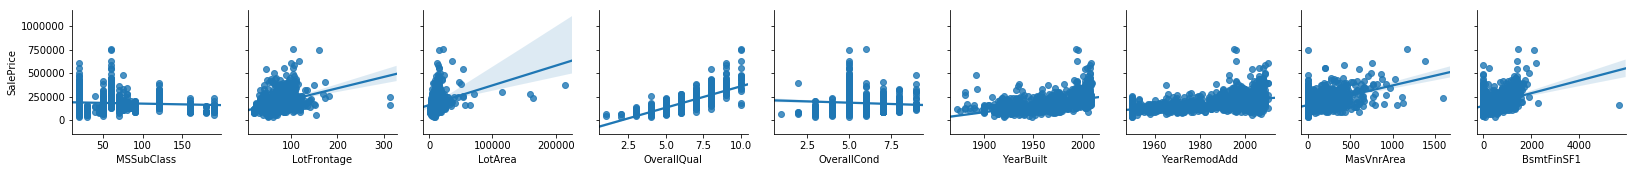

In [638]:
sns.pairplot(x_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF1'],
             y_vars='SalePrice',data=df,kind='reg')

- From the above graphs Except MSSubClass, rest all columns are following linear trend by increasing or decreasing trend with our target variable

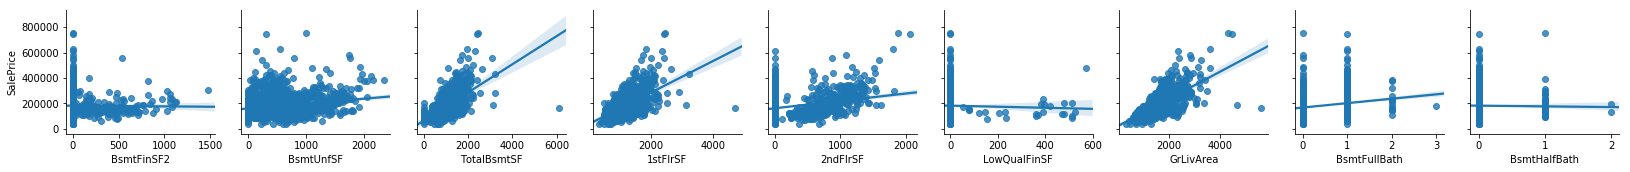

In [639]:
sns.pairplot(x_vars=['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'],
             y_vars='SalePrice',data=df,kind='reg')

- From the above graphs except BsmtFinSF2,LowQualFinSF and BsmtHalfBath rest all are following linear incresing or decreasing trend with our target variable

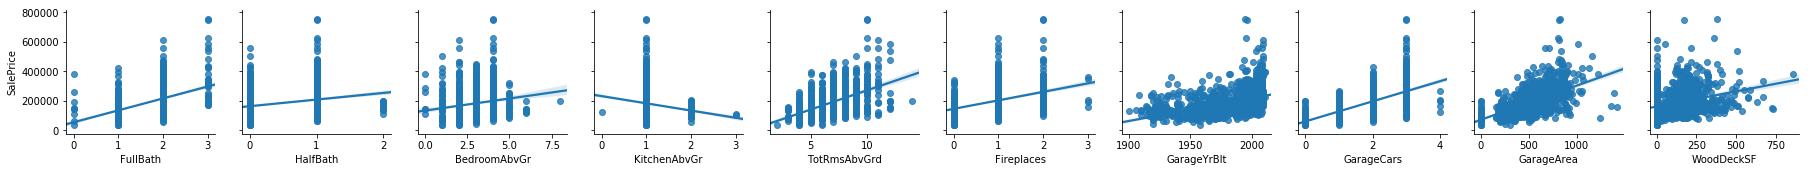

In [640]:
sns.pairplot(x_vars=['FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars',
                     'GarageArea', 'WoodDeckSF'],
             y_vars='SalePrice',data=df,kind='reg')

- From the above graphs all are following linearly increasing or decreasing Trend with our target variable

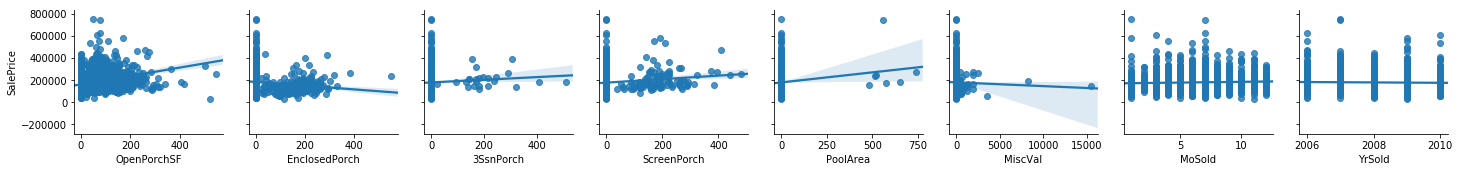

In [641]:
sns.pairplot(x_vars=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
             y_vars='SalePrice',data=df,kind='reg')

- From the above graphs except 'MoSold', 'YrSold' columns, rest  all are following lineary increasing or decreasing trend with our target variable.

# Visualizing categorical variables

In [642]:
# Extracting the categorical column names
df.columns[df.dtypes=='object']

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

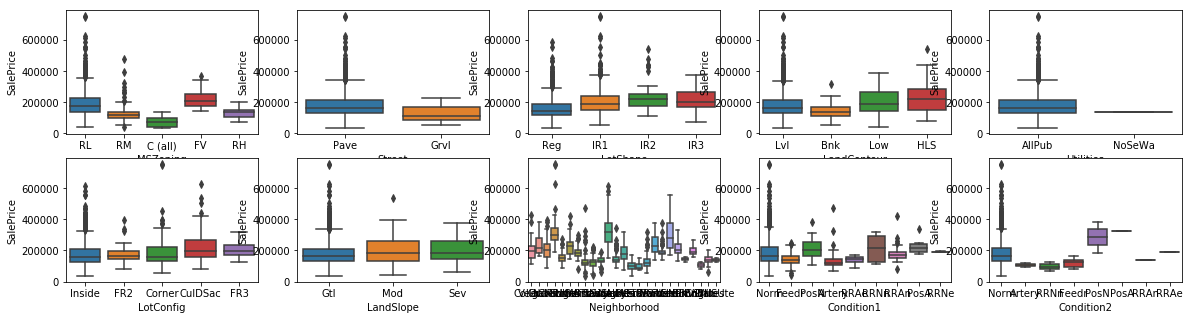

In [643]:
plt.figure(figsize=(20,5))
plt.subplot(2,5,1)
sns.boxplot(x='MSZoning',y='SalePrice',data=df)
plt.subplot(2,5,2)
sns.boxplot(x='Street',y='SalePrice',data=df)
plt.subplot(2,5,3)
sns.boxplot(x='LotShape',y='SalePrice',data=df)
plt.subplot(2,5,4)
sns.boxplot(x='LandContour',y='SalePrice',data=df)
plt.subplot(2,5,5)
sns.boxplot(x='Utilities',y='SalePrice',data=df)
plt.subplot(2,5,6)
sns.boxplot(x='LotConfig',y='SalePrice',data=df)
plt.subplot(2,5,7)
sns.boxplot(x='LandSlope',y='SalePrice',data=df)
plt.subplot(2,5,8)
sns.boxplot(x='Neighborhood',y='SalePrice',data=df)
plt.subplot(2,5,9)
sns.boxplot(x='Condition1',y='SalePrice',data=df)
plt.subplot(2,5,10)
sns.boxplot(x='Condition2',y='SalePrice',data=df)


- From the above graphs, MSzoning, street, lotshape and LandContour variables are more significant for high Sales Prices

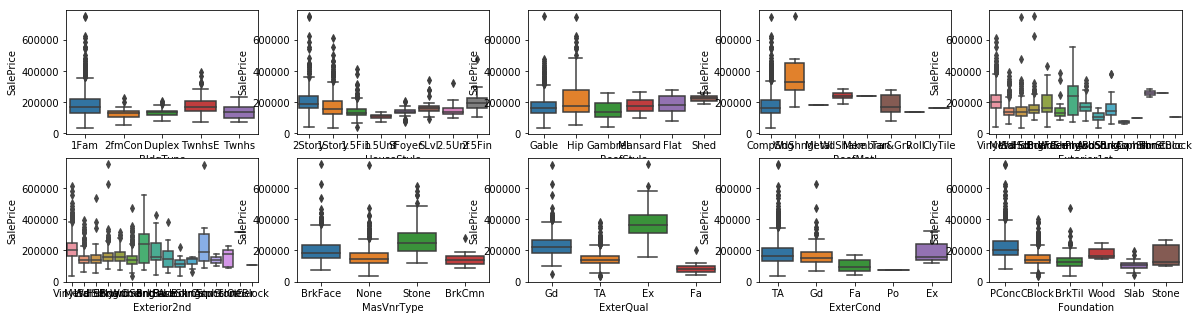

In [644]:
plt.figure(figsize=(20,5))
plt.subplot(2,5,1)
sns.boxplot(x='BldgType',y='SalePrice',data=df)
plt.subplot(2,5,2)
sns.boxplot(x='HouseStyle',y='SalePrice',data=df)
plt.subplot(2,5,3)
sns.boxplot(x='RoofStyle',y='SalePrice',data=df)
plt.subplot(2,5,4)
sns.boxplot(x='RoofMatl',y='SalePrice',data=df)
plt.subplot(2,5,5)
sns.boxplot(x='Exterior1st',y='SalePrice',data=df)
plt.subplot(2,5,6)
sns.boxplot(x='Exterior2nd',y='SalePrice',data=df)
plt.subplot(2,5,7)
sns.boxplot(x='MasVnrType',y='SalePrice',data=df)
plt.subplot(2,5,8)
sns.boxplot(x='ExterQual',y='SalePrice',data=df)
plt.subplot(2,5,9)
sns.boxplot(x='ExterCond',y='SalePrice',data=df)
plt.subplot(2,5,10)
sns.boxplot(x='Foundation',y='SalePrice',data=df)


- Here Building type, house style, roofstyle, ExterQual, Exter Cond and Foundation has significant impact on Sales Price

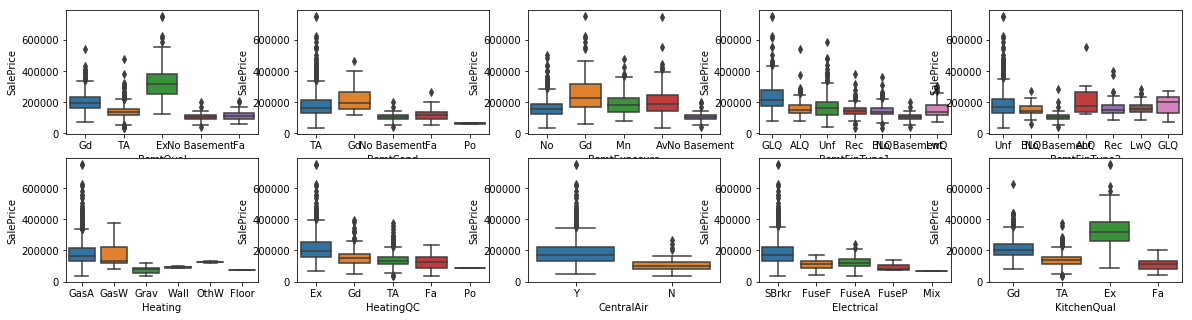

In [645]:
plt.figure(figsize=(20,5))
plt.subplot(2,5,1)
sns.boxplot(x='BsmtQual',y='SalePrice',data=df)
plt.subplot(2,5,2)
sns.boxplot(x='BsmtCond',y='SalePrice',data=df)
plt.subplot(2,5,3)
sns.boxplot(x='BsmtExposure',y='SalePrice',data=df)
plt.subplot(2,5,4)
sns.boxplot(x='BsmtFinType1',y='SalePrice',data=df)
plt.subplot(2,5,5)
sns.boxplot(x='BsmtFinType2',y='SalePrice',data=df)
plt.subplot(2,5,6)
sns.boxplot(x='Heating',y='SalePrice',data=df)
plt.subplot(2,5,7)
sns.boxplot(x='HeatingQC',y='SalePrice',data=df)
plt.subplot(2,5,8)
sns.boxplot(x='CentralAir',y='SalePrice',data=df)
plt.subplot(2,5,9)
sns.boxplot(x='Electrical',y='SalePrice',data=df)
plt.subplot(2,5,10)
sns.boxplot(x='KitchenQual',y='SalePrice',data=df)

- BsmtQual,Kitchen Quality, Central Air and BsmtExposure has significant impact on Sales Price

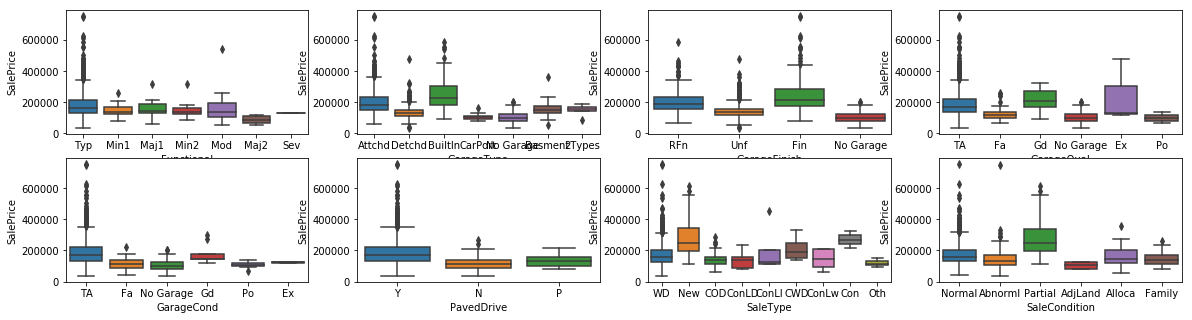

In [646]:
plt.figure(figsize=(20,5))
plt.subplot(2,4,1)
sns.boxplot(x='Functional',y='SalePrice',data=df)
plt.subplot(2,4,2)
sns.boxplot(x='GarageType',y='SalePrice',data=df)
plt.subplot(2,4,3)
sns.boxplot(x='GarageFinish',y='SalePrice',data=df)
plt.subplot(2,4,4)
sns.boxplot(x='GarageQual',y='SalePrice',data=df)
plt.subplot(2,4,5)
sns.boxplot(x='GarageCond',y='SalePrice',data=df)
plt.subplot(2,4,6)
sns.boxplot(x='PavedDrive',y='SalePrice',data=df)
plt.subplot(2,4,7)
sns.boxplot(x='SaleType',y='SalePrice',data=df)
plt.subplot(2,4,8)
sns.boxplot(x='SaleCondition',y='SalePrice',data=df)


- Here compare to all the variables GarageFinish and PavedDrive has most significant impact on Sales Price

In [647]:
# Number of unique classes in each categorical columns
df.select_dtypes('object').apply(pd.Series.nunique,axis=0)

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

- It seems there are more categories in all the categorical variables. Instead of taking all of them we will consider the most important categories by taking the cumulative count.

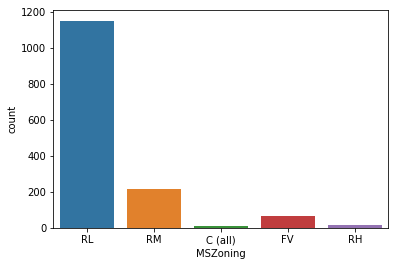

In [648]:
sns.countplot(x='MSZoning',data=df)

- From the above graph, RL is the most important category and C,RH are least important in MSZoning variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

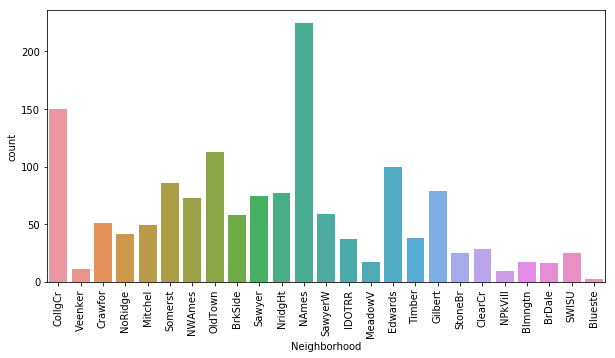

In [649]:
plt.figure(figsize=(10,5))
sns.countplot(x='Neighborhood',data=df)
plt.xticks(rotation=90)

- From the above graph Names and CollgCr has most values and rest of the categories are relatively small

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

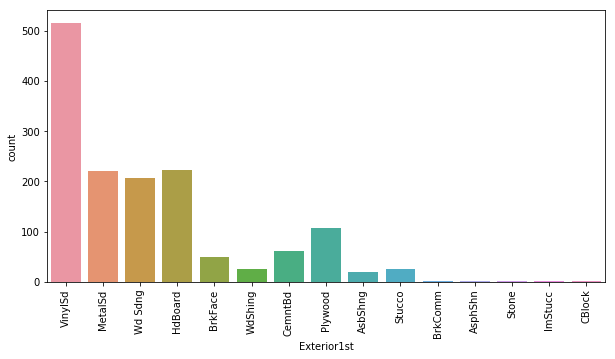

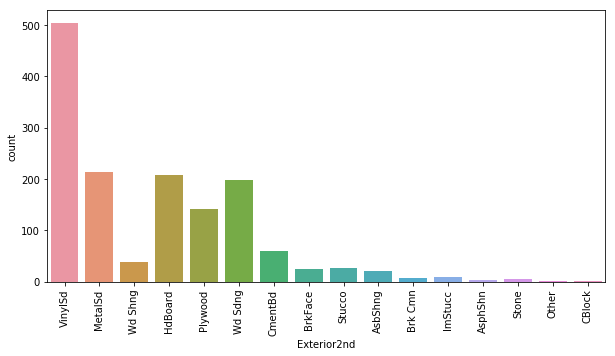

In [650]:
plt.figure(figsize=(10,5))
sns.countplot(x='Exterior1st',data=df)
plt.xticks(rotation=90)

plt.figure(figsize=(10,5))
sns.countplot(x='Exterior2nd',data=df)
plt.xticks(rotation=90)

- From the above two graphs of  Exterior1st and Exterior2nd both columns has same set of categories.
- Basically Exterior 2nd tells about if more than one material is used for house covering

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

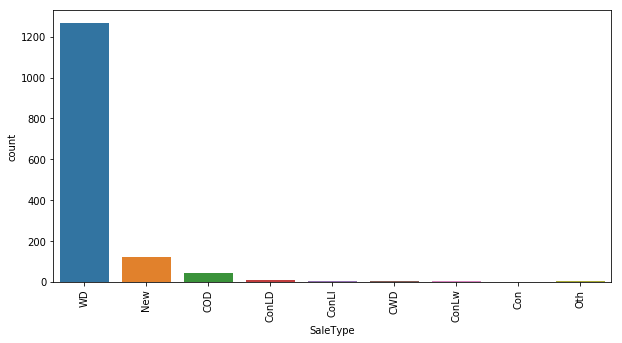

In [651]:
plt.figure(figsize=(10,5))
sns.countplot(x='SaleType',data=df)
plt.xticks(rotation=90)

- From the above graphs WD(Warranty Deed) has more contribution from the data

In [652]:
# Fincing the numeric variables to plot correlation
num_cols = df.select_dtypes(include=['float64', 'int64'])
# correlation matrix
cor = num_cols.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

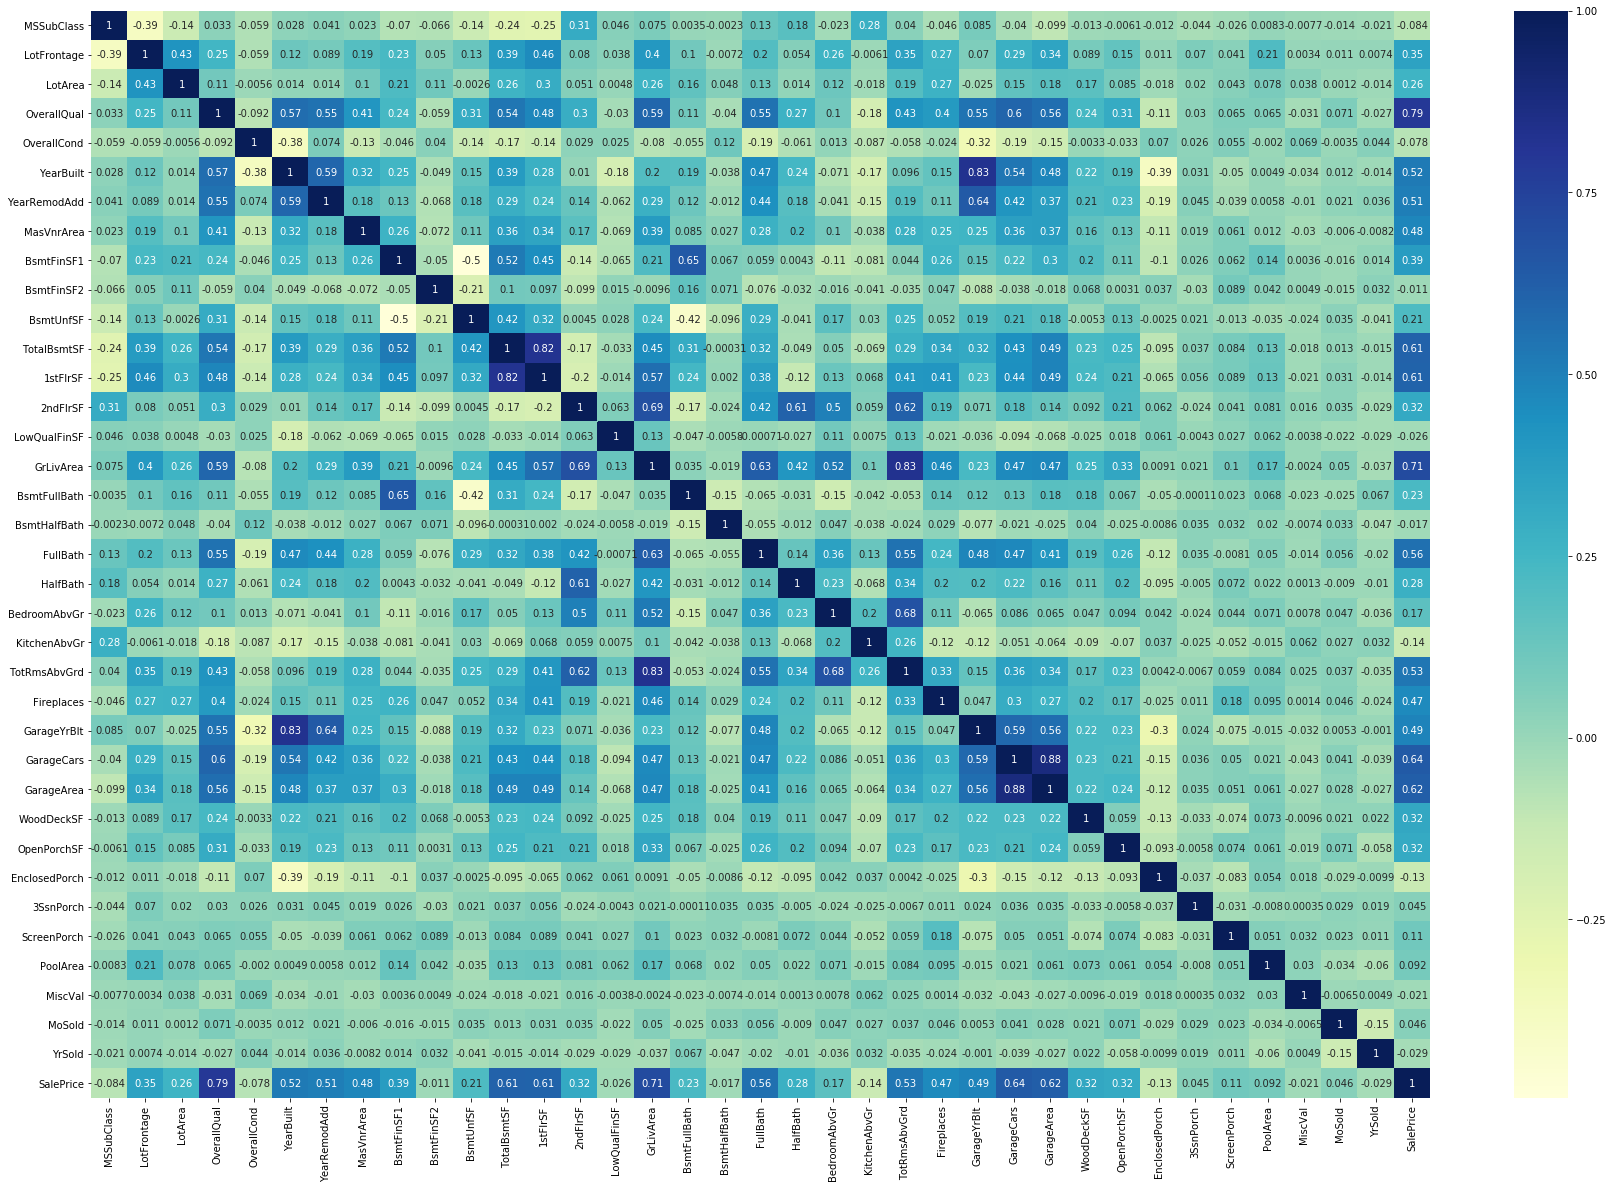

In [653]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

- Eventhough the above graph is little messy to understand the correlation but could see that based on the colour there is strong correlation between few variables 

# Checking the variables distribution to scale them accordingly

In [579]:
# Function to plot distplot graphs to numeric variables
def distplot_function(data,col):
    sns.distplot(data[data[col].notnull()][col])
    plt.show()

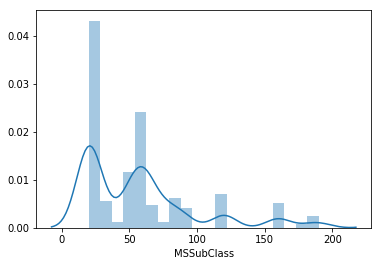

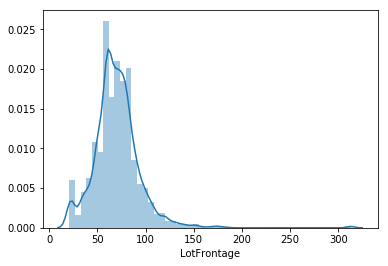

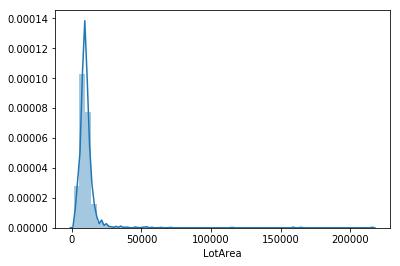

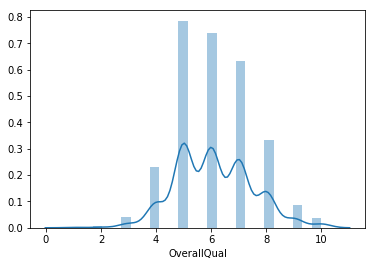

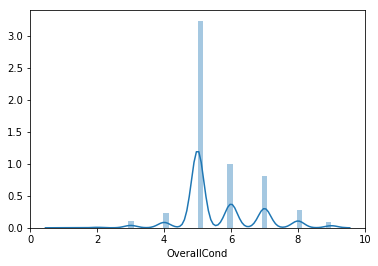

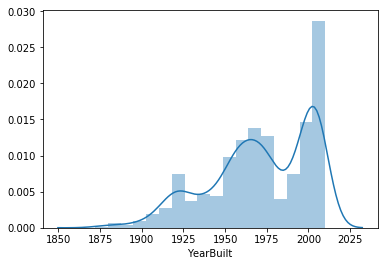

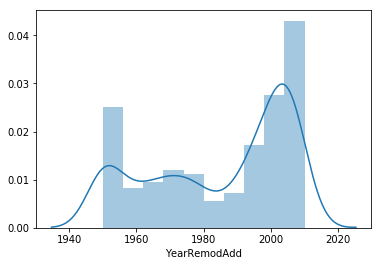

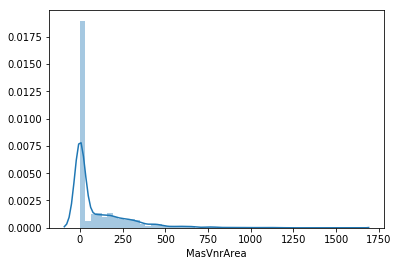

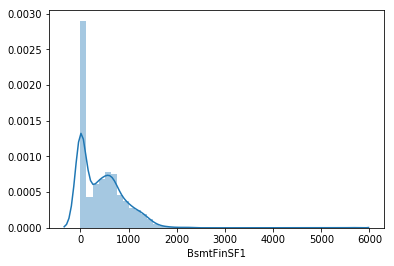

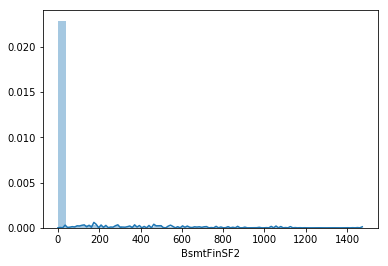

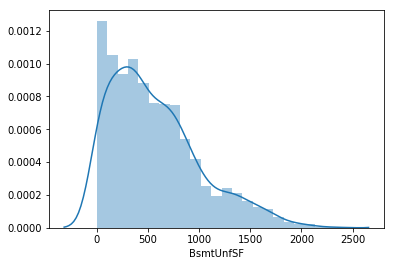

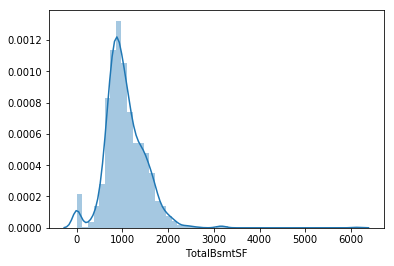

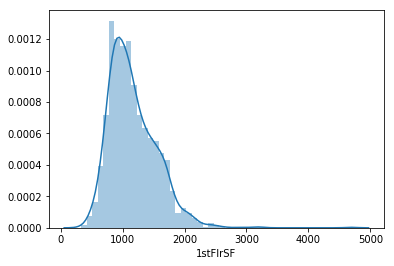

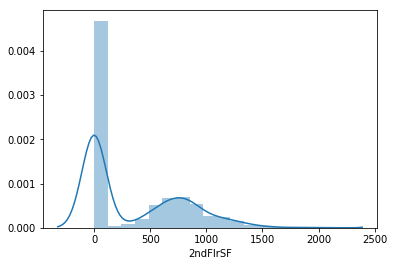

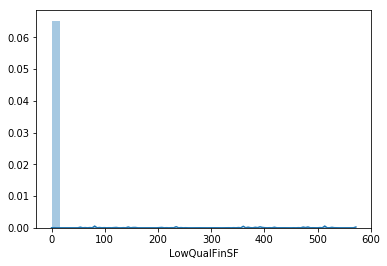

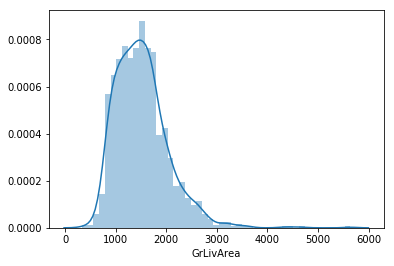

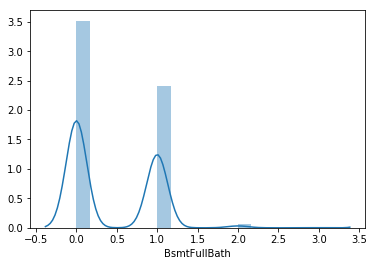

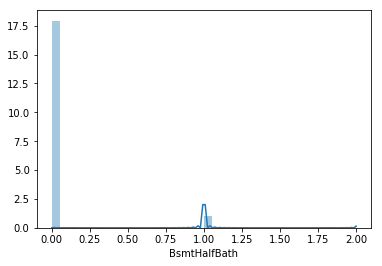

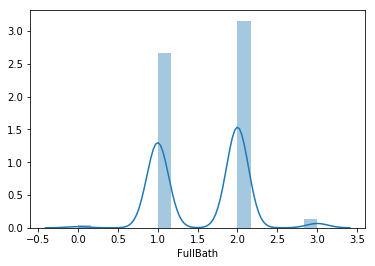

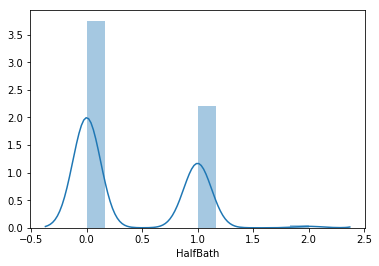

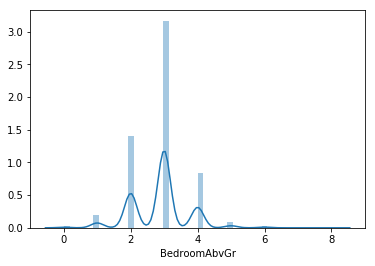

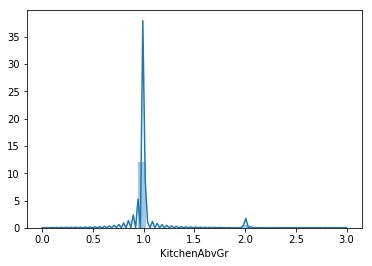

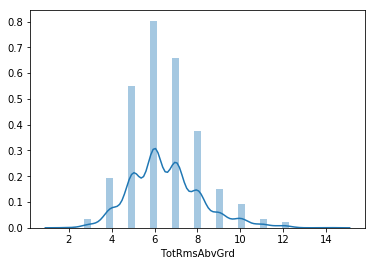

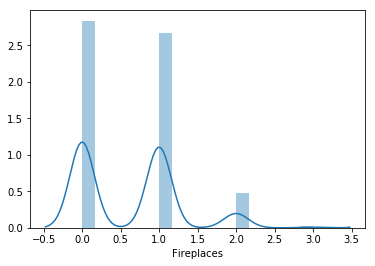

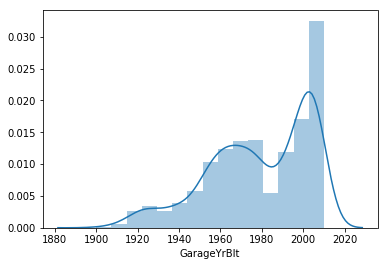

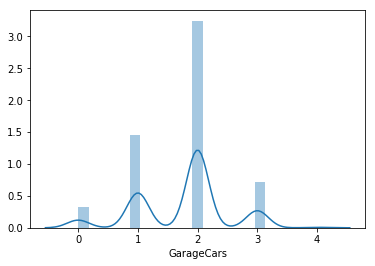

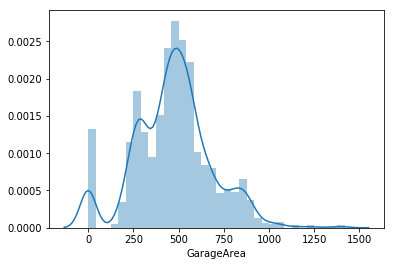

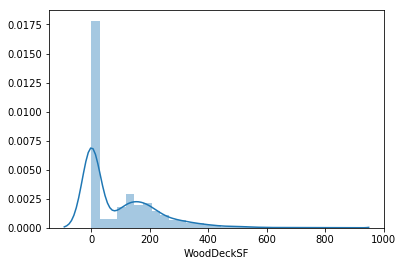

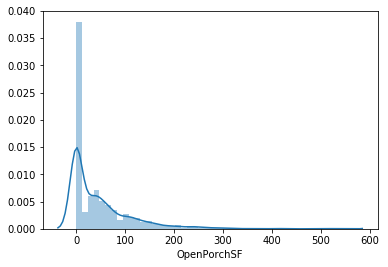

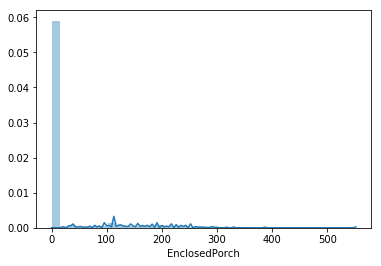

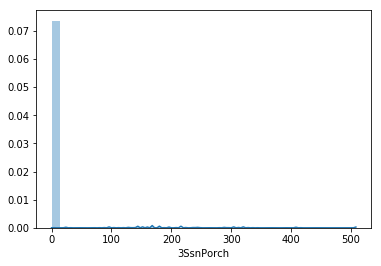

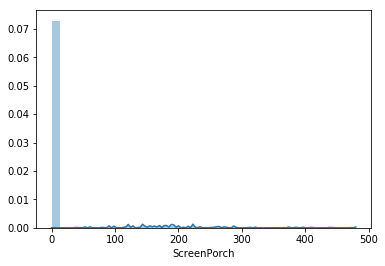

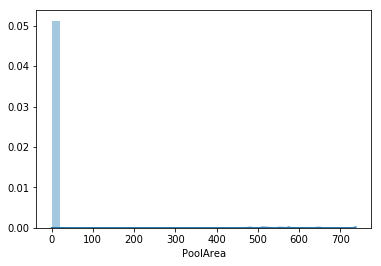

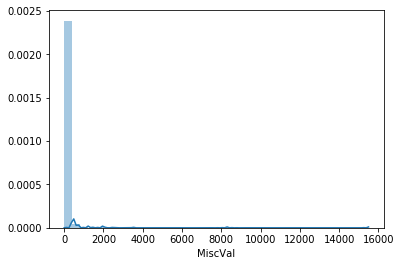

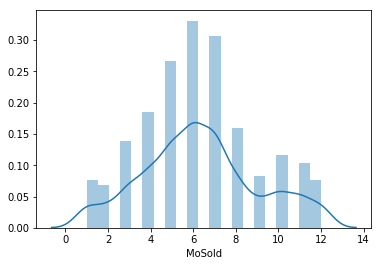

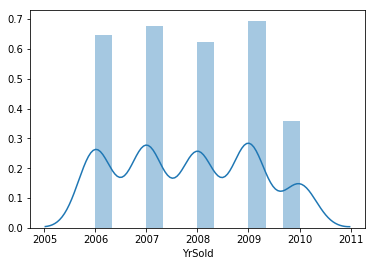

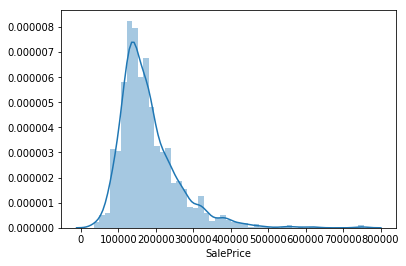

In [580]:
for i in num_cols.columns:
    distplot_function(num_cols,i)

- **Insights from the above distribution plots:**
    - Variables 'MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
'GarageCars','MoSold','YrSold' are marked as numeric but they belongs to categorical.
    - Most of the variables are Right Skewed, so better to apply log transformatioin to bring them to the normal distribution.
    - Most important is our **Target variable - SalePrice' is not normally distributed'**

# Data Preparation

In [581]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attchd   
3          Gd      

In [659]:
# Deriving new columns of BuildingAge based on Present year - Year Built column
df['Building_Age'] = 2019-df['YearBuilt']

In [660]:
# Converting Time and above listed categories variables to Object type from integer
li = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath', 
    'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']
for col in li:
    df[col] = df[col].astype('object')

In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       14

In [662]:
round(df.isnull().sum().sort_values(ascending=False)*100/len(df),2).head(15)

LotFrontage     17.74
GarageYrBlt      5.55
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
BsmtQual         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
Building_Age     0.00
BsmtCond         0.00
RoofMatl         0.00
BsmtFinType1     0.00
dtype: float64

- We can simply fill the missing values of int, float with Median and for Object values with mode

In [663]:
# Filling Missing values of numeric columns with median
num_cols = df.select_dtypes(include=[np.float64,np.int64]).columns.tolist()
df[num_cols]=df.select_dtypes(include=[np.float64,np.int64]).fillna(df.select_dtypes(include=[np.float64,np.int64]).median().iloc[0])

In [664]:
round(df.isnull().sum().sort_values(ascending=False)*100/len(df),2).head(15)

MasVnrType      0.55
Electrical      0.07
HeatingQC       0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrArea      0.00
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        0.00
BsmtCond        0.00
BsmtExposure    0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinType2    0.00
dtype: float64

In [665]:
# Filling missing values of categorical columns with mode
category_cols = ['MasVnrType','Electrical']

for column in category_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [666]:
# Cross checking the missing values
round(df.isnull().sum().sort_values(ascending=False)*100/len(df),2).head(15)

Building_Age    0.0
SalePrice       0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
dtype: float64

- From above we could see that all the missing values are treated successfully

# Implementing log Transformation to the skewed variables
  

In [667]:
#df= df2.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A9D0093D30>,
      dtype=object)

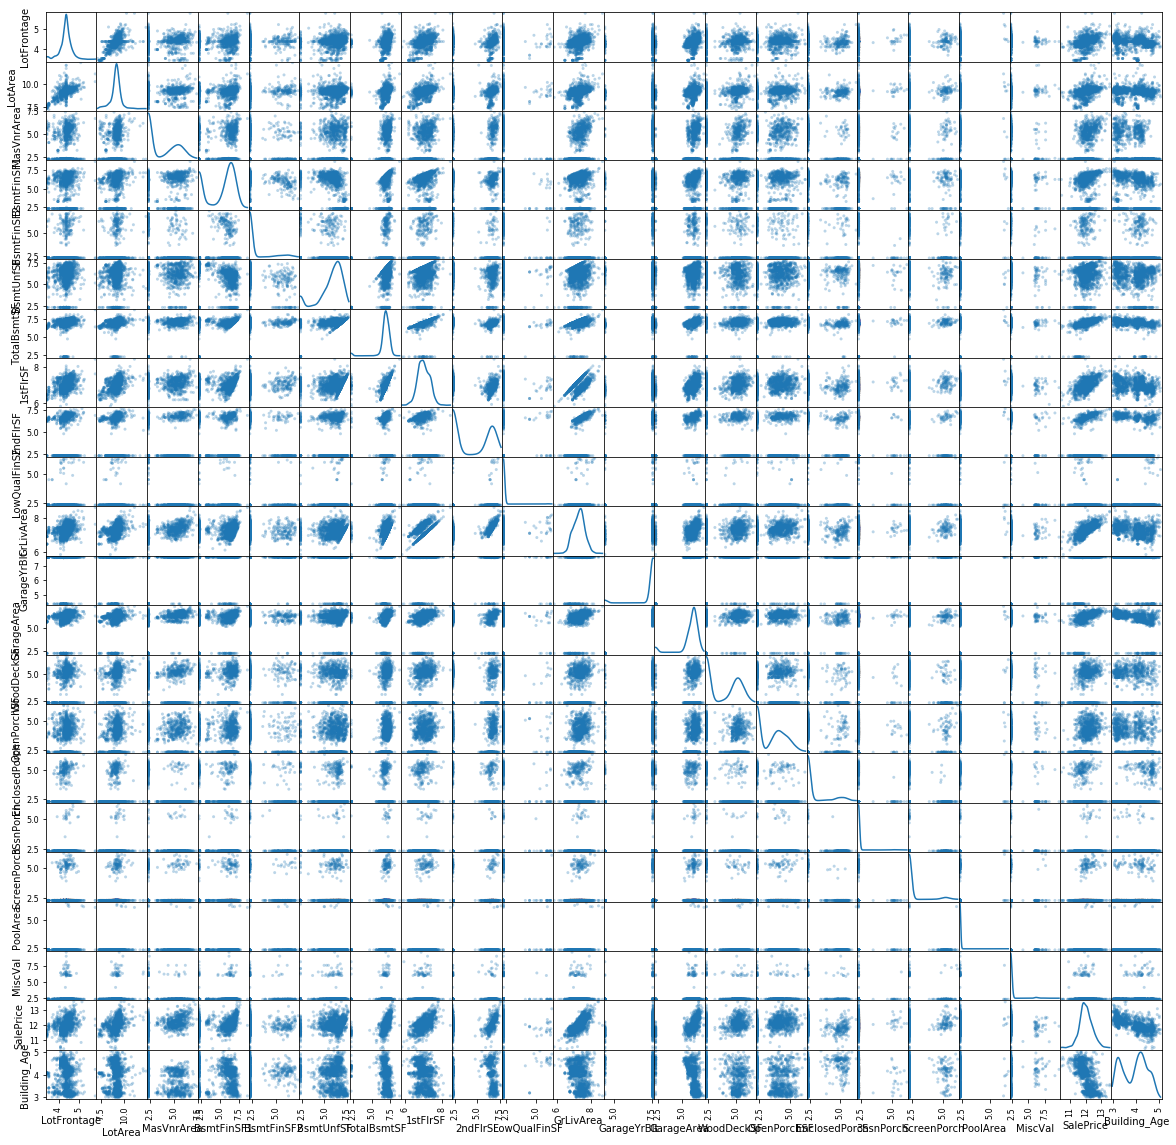

In [668]:
# Adding constant of 10 to all the variables to make it positive 
pd.scatter_matrix(np.log(df[num_cols]+10), alpha = 0.3, figsize = (20,20), diagonal = 'kde')

- From the above output we can see that most of the columns are converted to normal distribution after log transformation

In [669]:
# Before log transformation
df.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.495205   443.639726    46.549315   
std      22.027677    9981.264932   180.587278   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  GarageYrBlt   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1515.463699  1872.567808   472.980137    94.244521    46.660274   
std     525.480383   437.919748   213.804841   125.338794    66.256028   
min     334.000000    69.000000     0.000000     0.000000     0.000000   
25%    1129.500000  1958.000000   334.500000     0.000000     0.000000   
50%    1464.000000  1977.000000   480.000000     0.000000    25.000000   
75%    1776.750000  2001.000000   576.000000   168.000000    68.000000   
max    5642.000000  2010.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

           SalePrice  Building_Age  
count    1460.000000   1460.000000  
mean   180921.195890     47.732192  
std     79442.502883     30.202904  
min     34900.000000      9.000000  
25%    129975.000000     19.000000  
50%    163000.000000     46.000000  
75%    214000.000000     65.000000  
max    755000.000000    147.000000

In [670]:
for i in num_cols:   
    df[i] = np.log(df[i]+10)

In [671]:
df.describe()

LotFrontage      LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      4.344905     9.112118     3.530333     4.988443     2.699279   
std       0.270554     0.516659     1.553847     1.964788     1.135109   
min       3.433987     7.177782     2.302585     2.302585     2.302585   
25%       4.248495     8.931089     2.302585     2.302585     2.302585   
50%       4.369448     9.157836     2.302585     5.975080     2.302585   
75%       4.488636     9.359751     5.160488     6.582371     2.302585   
max       5.777652    12.279579     7.383989     8.640119     7.302496   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean      5.860461     6.818089     7.016967     4.177519      2.362149   
std       1.303618     0.809245     0.314769     2.162784      0.451268   
min       2.302585     2.302585     5.840642     2.302585      2.302585   
25%       5.451038     6.691773     6.793466     2.302585      2.302585   
50%       6.189286     6.909254     7.000334     2.302585      2.302585   
75%       6.706862     7.176446     7.245120     6.603944      2.302585   
max       7.760467     8.719317     8.455743     7.637716      6.366470   

         GrLivArea  GarageYrBlt   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      7.275121     7.416106     5.955196     3.686911     3.428372   
std       0.331095     0.738740     0.955573     1.492772     1.116909   
min       5.840642     4.369448     2.302585     2.302585     2.302585   
25%       7.038345     7.584773     5.842065     2.302585     2.302585   
50%       7.295735     7.594381     6.194405     2.302585     3.555348   
75%       7.488153     7.606387     6.373320     5.181784     4.356709   
max       8.639765     7.610853     7.264030     6.765039     6.322565   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea      MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean        2.683581     2.351367     2.534629     2.322052     2.454652   
std         0.956358     0.383133     0.797690     0.280721     0.807562   
min         2.302585     2.302585     2.302585     2.302585     2.302585   
25%         2.302585     2.302585     2.302585     2.302585     2.302585   
50%         2.302585     2.302585     2.302585     2.302585     2.302585   
75%         2.302585     2.302585     2.302585     2.302585     2.302585   
max         6.331502     6.249975     6.194405     6.617403     9.649240   

         SalePrice  Building_Age  
count  1460.000000   1460.000000  
mean     12.024116      3.910713  
std       0.399426      0.551678  
min      10.460529      2.944439  
25%      11.775174      3.367296  
50%      12.001567      4.025352  
75%      12.273778      4.317488  
max      13.534486      5.056246

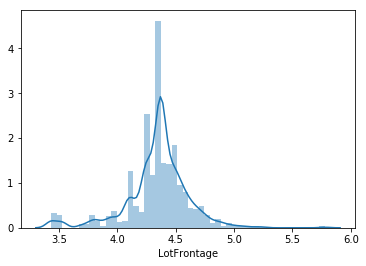

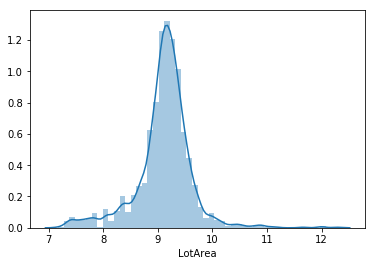

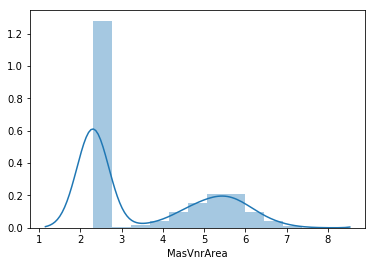

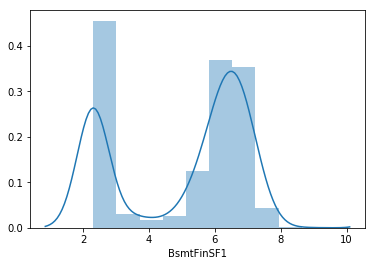

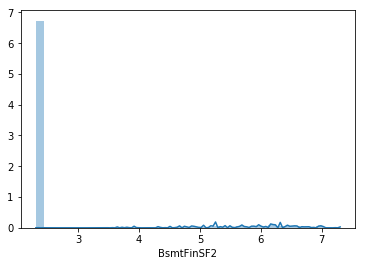

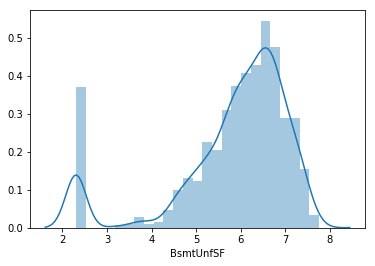

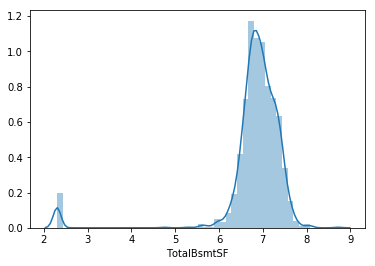

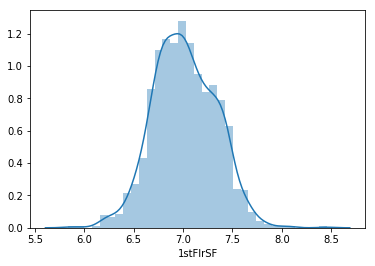

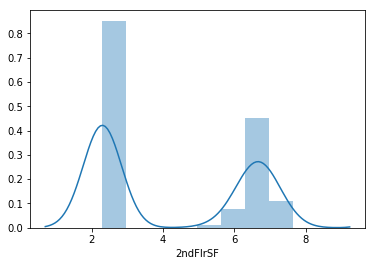

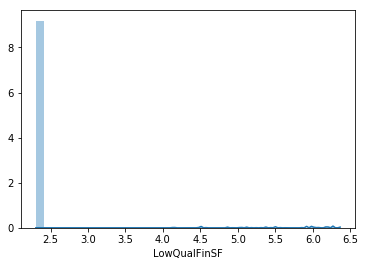

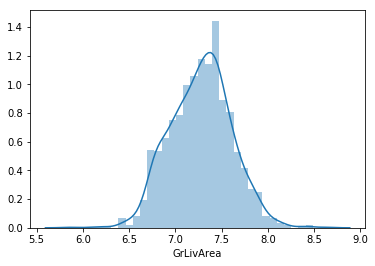

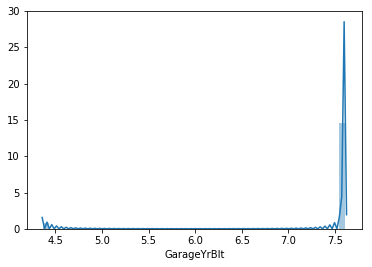

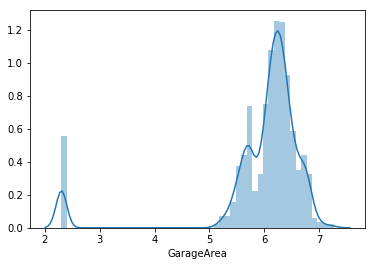

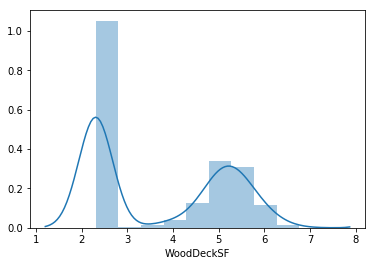

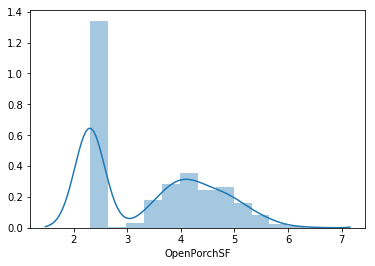

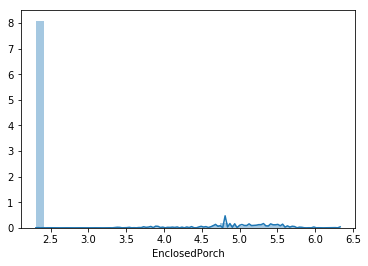

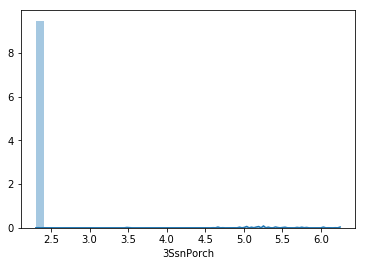

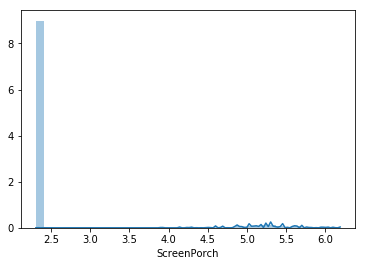

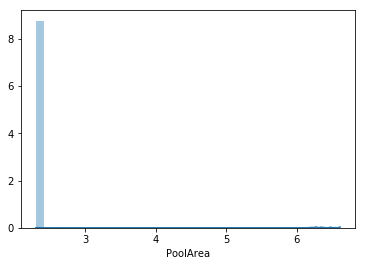

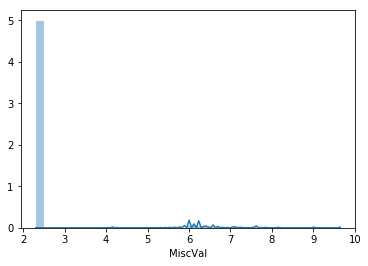

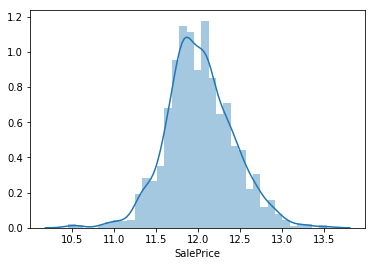

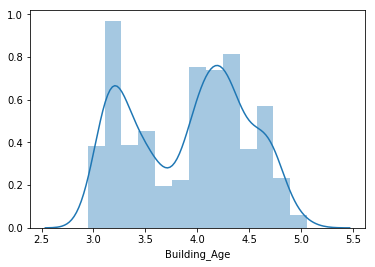

In [672]:
# Checking the distribution after log transformation
for i in num_cols:
    distplot_function(df,i)

- Max most of the variables are normally distributed after log transformation
- **Target variable 'SalePrice' also normally distributed**
- There are no specific outliers from the graphs as they are in the permissible level only.
- Will apply Scaling to the variable to make fall all values under one scale


In [673]:
df.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0         60       RL     4.317488  9.043104   Pave      Reg         Lvl   
1         20       RL     4.499810  9.170560   Pave      Reg         Lvl   
2         60       RL     4.356709  9.329012   Pave      IR1         Lvl   
3         70       RL     4.248495  9.165343   Pave      IR1         Lvl   
4         60       RL     4.543295  9.565915   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond YearBuilt YearRemodAdd RoofStyle  \
0     2Story           7           5      2003         2003     Gable   
1     1Story           6           8      1976         1976     Gable   
2     2Story           7           5      2001         2002     Gable   
3     2Story           7           5      1915         1970     Gable   
4     2Story           8           5      2000         2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace    5.327876        Gd        TA   
1  CompShg     MetalSd     MetalSd       None    2.302585        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace    5.147494        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None    2.302585        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace    5.886104        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ    6.573680   
1     CBlock       Gd       TA           Gd          ALQ    6.895683   
2      PConc       Gd       TA           Mn          GLQ    6.206576   
3     BrkTil       TA       Gd           No          ALQ    5.420535   
4      PConc       Gd       TA           Av          GLQ    6.499787   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf    2.302585   5.075174     6.763885    GasA        Ex   
1          Unf    2.302585   5.683580     7.148346    GasA        Ex   
2          Unf    2.302585   6.095825     6.835185    GasA        Ex   
3          Unf    2.302585   6.309918     6.641182    GasA        Gd   
4          Unf    2.302585   6.214608     7.051856    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.763885  6.761573      2.302585   7.450080   
1          Y      SBrkr  7.148346  2.302585      2.302585   7.148346   
2          Y      SBrkr  6.835185  6.775366      2.302585   7.493317   
3          Y      SBrkr  6.878326  6.641182      2.302585   7.454141   
4          Y      SBrkr  7.051856  6.968850      2.302585   7.699842   

  BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr  \
0            1            0        2        1            3            1   
1            0            1        2        0            3            1   
2            1            0        2        1            3            1   
3            1            0        1        0            3            1   
4            1            0        2        1            4            1   

  KitchenQual TotRmsAbvGrd Functional Fireplaces   FireplaceQu GarageType  \
0          Gd            8        Typ          0  No Fireplace     Attchd   
1          TA            6        Typ          1            TA     Attchd   
2          Gd            6        Typ          1            TA     Attchd   
3          Gd            7        Typ          1            Gd     Detchd   
4        

In [678]:
# Removing the Target variable - 'SalePrice' from the list
num_cols.remove('SalePrice')

In [679]:
# Cross check to confirm Target variable is removed or not
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [117]:
'''
# Function to Removing outliers
def deloutlier(col,df):
    upper_quartile = np.percentile(df[col], 75)
    lower_quartile = np.percentile(df[col], 25)
    iqr = upper_quartile - lower_quartile
    return (df[(df[col]> (lower_quartile-1.5*iqr))&(df[col]<(upper_quartile+1.5*iqr))][col])

# Removing outlilers from numeric columns
for i in numeric_cols:
    df[i] = deloutlier(i,df)
'''    

In [680]:
df.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0         60       RL     4.317488  9.043104   Pave      Reg         Lvl   
1         20       RL     4.499810  9.170560   Pave      Reg         Lvl   
2         60       RL     4.356709  9.329012   Pave      IR1         Lvl   
3         70       RL     4.248495  9.165343   Pave      IR1         Lvl   
4         60       RL     4.543295  9.565915   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond YearBuilt YearRemodAdd RoofStyle  \
0     2Story           7           5      2003         2003     Gable   
1     1Story           6           8      1976         1976     Gable   
2     2Story           7           5      2001         2002     Gable   
3     2Story           7           5      1915         1970     Gable   
4     2Story           8           5      2000         2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace    5.327876        Gd        TA   
1  CompShg     MetalSd     MetalSd       None    2.302585        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace    5.147494        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None    2.302585        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace    5.886104        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ    6.573680   
1     CBlock       Gd       TA           Gd          ALQ    6.895683   
2      PConc       Gd       TA           Mn          GLQ    6.206576   
3     BrkTil       TA       Gd           No          ALQ    5.420535   
4      PConc       Gd       TA           Av          GLQ    6.499787   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf    2.302585   5.075174     6.763885    GasA        Ex   
1          Unf    2.302585   5.683580     7.148346    GasA        Ex   
2          Unf    2.302585   6.095825     6.835185    GasA        Ex   
3          Unf    2.302585   6.309918     6.641182    GasA        Gd   
4          Unf    2.302585   6.214608     7.051856    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.763885  6.761573      2.302585   7.450080   
1          Y      SBrkr  7.148346  2.302585      2.302585   7.148346   
2          Y      SBrkr  6.835185  6.775366      2.302585   7.493317   
3          Y      SBrkr  6.878326  6.641182      2.302585   7.454141   
4          Y      SBrkr  7.051856  6.968850      2.302585   7.699842   

  BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr  \
0            1            0        2        1            3            1   
1            0            1        2        0            3            1   
2            1            0        2        1            3            1   
3            1            0        1        0            3            1   
4            1            0        2        1            4            1   

  KitchenQual TotRmsAbvGrd Functional Fireplaces   FireplaceQu GarageType  \
0          Gd            8        Typ          0  No Fireplace     Attchd   
1          TA            6        Typ          1            TA     Attchd   
2          Gd            6        Typ          1            TA     Attchd   
3          Gd            7        Typ          1            Gd     Detchd   
4        

In [681]:
# Function to retrieve the main categorical categories after cumulative calculation
def main_categories(data,column):

    cumsum = pd.DataFrame(data[column].value_counts()*100/len(data[column]))
    total=0
    j = 0
    values = []
    for i in cumsum.iloc[:,0]:
        total += i    
        if total <=95:
            values.append(cumsum.index[j])
            j += 1       
    return values

In [682]:
# Number of unique classes in each categorical columns
df.select_dtypes('object').apply(pd.Series.nunique,axis=0).sort_values(ascending=False)

YearBuilt        112
YearRemodAdd      61
Neighborhood      25
Exterior2nd       16
MSSubClass        15
Exterior1st       15
TotRmsAbvGrd      12
MoSold            12
OverallQual       10
Condition1         9
SaleType           9
OverallCond        9
BedroomAbvGr       8
HouseStyle         8
Condition2         8
RoofMatl           8
BsmtFinType2       7
BsmtFinType1       7
GarageType         7
Functional         7
Heating            6
GarageCond         6
GarageQual         6
RoofStyle          6
FireplaceQu        6
Foundation         6
SaleCondition      6
HeatingQC          5
MSZoning           5
BsmtExposure       5
BsmtCond           5
BsmtQual           5
Electrical         5
ExterCond          5
LotConfig          5
YrSold             5
MiscFeature        5
Fence              5
GarageCars         5
BldgType           5
PoolQC             4
LotShape           4
LandContour        4
FullBath           4
GarageFinish       4
KitchenQual        4
BsmtFullBath       4
MasVnrType   

- From above categories lets take the variables which has 8 and beyond 8 categories, consider only main categories from them.
  - YearBuilt        112
  - YearRemodAdd      61
  - Neighborhood      25
  - Exterior2nd       16
  - MSSubClass        15
  - Exterior1st       15
  - TotRmsAbvGrd      12
  - MoSold            12
  - OverallQual       10
  - Condition1         9
  - SaleType           9
  - OverallCond        9
  - BedroomAbvGr       8
  - HouseStyle         8
  - Condition2         8
  - RoofMatl           8

In [690]:
#df2 = df.copy()
#df = df2.copy()

In [691]:
# Considering only High Categories and treating low priority categories as others
year_contains = main_categories(df,'YearBuilt')
df['YearBuilt'] = df['YearBuilt'].apply(lambda x: x if x in year_contains else "other_YearBuilt")

MSSubClass_contains = main_categories(df,'MSSubClass')
df['MSSubClass'] = df['MSSubClass'].apply(lambda x : x if x in MSSubClass_contains else 'other_MSSubClass')

garage_contains = main_categories(df,'GarageYrBlt')
df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x: x if x in garage_contains else 'other_GarageYrBlt')

Year_remod_contains = main_categories(df,'YearRemodAdd')
df['YearRemodAdd'] = df['YearRemodAdd'].apply(lambda x : x if x in Year_remod_contains else 'other_YearRemodAdd')

neighbour_contains = main_categories(df,'Neighborhood')
df['Neighborhood'] = df['Neighborhood'].apply(lambda x : x if x in neighbour_contains else 'other_Neighborhood')

exterior2nd_contains = main_categories(df,'Exterior2nd')
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x : x if x in exterior2nd_contains else 'other_Exterior2nd')

exterior1st_contains = main_categories(df,'Exterior1st')
df['Exterior1st'] = df['Exterior1st'].apply(lambda x: x if x in exterior1st_contains else 'other_Exterior1st')

TotRmsAbvGrd_contains = main_categories(df,'TotRmsAbvGrd')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].apply(lambda x : x if x in TotRmsAbvGrd_contains else 'other_TotRmsAbvGrd')

mosold_contains = main_categories(df,'MoSold')
df['MoSold'] = df['MoSold'].apply(lambda x: x if x in mosold_contains else 'other_MoSold')

condition1_contains = main_categories(df,'Condition1')
df['Condition1'] = df['Condition1'].apply(lambda x : x if x in condition1_contains else 'other_Condition1')

condition2_contains = main_categories(df,'Condition2')
df['Condition2'] = df['Condition2'].apply(lambda x : x if x in condition2_contains else 'other_Condition2')

SaleType_contains = main_categories(df,'SaleType')
df['SaleType'] = df['SaleType'].apply(lambda x: x if x in SaleType_contains else 'other_SaleType')

HouseStyle_contains = main_categories(df,'HouseStyle')
df['HouseStyle'] = df['HouseStyle'].apply(lambda x : x if x in HouseStyle_contains else 'other_HouseStyle')

RoofMatl_contains = main_categories(df,'RoofMatl')
df['RoofMatl'] = df['RoofMatl'].apply(lambda x : x if x in RoofMatl_contains else 'other_RoofMatl')


In [692]:
df.select_dtypes('object').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [693]:
# Creating dummy variables and removing the first variable to get rid of dummy variable trap
df = pd.get_dummies(df, prefix=['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],drop_first=True)


In [694]:
df.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     4.317488  9.043104    5.327876    6.573680    2.302585   5.075174   
1     4.499810  9.170560    2.302585    6.895683    2.302585   5.683580   
2     4.356709  9.329012    5.147494    6.206576    2.302585   6.095825   
3     4.248495  9.165343    2.302585    5.420535    2.302585   6.309918   
4     4.543295  9.565915    5.886104    6.499787    2.302585   6.214608   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0     6.763885  6.763885  6.761573      2.302585   7.450080    6.324359   
1     7.148346  7.148346  2.302585      2.302585   7.148346    6.152733   
2     6.835185  6.835185  6.775366      2.302585   7.493317    6.426488   
3     6.641182  6.878326  6.641182      2.302585   7.454141    6.480045   
4     7.051856  7.051856  6.968850      2.302585   7.699842    6.740519   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    2.302585     4.262680       2.302585   2.302585     2.302585  2.302585   
1    5.730100     2.302585       2.302585   2.302585     2.302585  2.302585   
2    2.302585     3.951244       2.302585   2.302585     2.302585  2.302585   
3    2.302585     3.806662       5.641907   2.302585     2.302585  2.302585   
4    5.308268     4.543295       2.302585   2.302585     2.302585  2.302585   

    MiscVal  SalePrice  Building_Age  MSSubClass_30  MSSubClass_50  \
0  2.302585  12.247742      3.258097              0              0   
1  2.302585  12.109066      3.970292              0              0   
2  2.302585  12.317211      3.332205              0              0   
3  2.302585  11.849469      4.736198              0              0   
4  2.302585  12.429256      3.367296              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_80  MSSubClass_90  MSSubClass_120  \
0              1              0              0              0               0   
1              0              0              0              0               0   
2              1              0              0              0               0   
3              0              1              0              0               0   
4              1              0              0              0               0   

   MSSubClass_160  MSSubClass_other_MSSubClass  MSZoning_FV  MSZoning_RH  \
0               0                            0            0            0   
1               0                            0            0            0   
2               0                            0            0            0   
3               0                            0            0            0   
4               0                            0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0         

In [695]:
df.select_dtypes(['int','float']).columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
       'Building_Age'],
      dtype='object')

In [696]:
# Seperating Independent and Dependent variables
y = df.loc[:, 'SalePrice']
X = df.loc[:, df.columns != 'SalePrice']

In [697]:
# Imporing Standard Scaler to scale the variables and train test split libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 1)

In [698]:
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
632      4.553877  9.385134    5.389072    6.723832    2.302585   6.352629   
208      4.369448  9.573176    4.927254    6.980076    2.302585   4.624973   
83       4.499810  9.094031    4.330733    2.302585    2.302585   6.980076   
1174     4.499810  9.715349    2.302585    6.240276    2.302585   6.129050   
250      4.174387  8.586719    2.302585    2.302585    2.302585   6.603944   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
632      7.241366  7.259116  2.302585      2.302585   7.259116    6.317165   
208      7.062192  7.081709  6.793466      2.302585   7.636270    6.139885   
83       6.980076  6.980076  2.302585      2.302585   6.980076    6.154858   
1174     6.869014  7.073270  7.077498      2.302585   7.764296    5.913503   
250      6.603944  7.182352  2.302585      2.302585   7.182352    2.302585   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
632     5.308268     2.302585       2.302585   2.302585     2.302585   
208     4.248495     4.174387       2.302585   2.302585     5.099866   
83      4.430817     2.302585       2.302585   2.302585     2.302585   
1174    2.302585     2.302585       2.302585   2.302585     2.302585   
250     5.609472     2.302585       2.302585   2.302585     2.302585   

      PoolArea   MiscVal  Building_Age  MSSubClass_30  MSSubClass_50  \
632   2.302585  2.302585      3.951244              0              0   
208   2.302585  2.302585      3.713572              0              0   
83    2.302585  2.302585      4.234107              0              0   
1174  2.302585  2.302585      4.574711              0              0   
250   2.302585  6.131226      4.488636              1              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_80  MSSubClass_90  \
632               0              0              0              0   
208               1              0              0              0   
83                0              0              0              0   
1174              0              1              0              0   
250               0              0              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_other_MSSubClass  \
632                0               0                            0   
208                0               0                            0   
83                 0               0                            0   
1174               0               0                            0   
250                0               0                            0   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
632             0            0            1            0            1   
208             0            0            1            0            1   
83              0            0            1            0            1   
1174            0            0            1            0            1   
250             0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
632              0             0             1                0   
208              0             0             0                0   
83               0             0             0                0   
1174             0             0             0                0   
250              0             0             0                0   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
632                 0                1                 0                  0   
208                 1                0                 0                  0   
83                  0                1                 0                  0   
1174                0                1                 0                  0   
250                 0                1                 0                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlo

In [700]:
cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','Building_Age']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

# Let's implement Lasso Regression 

In [729]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import KFold

In [730]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9142239895954566
0.8818592095602191


- **Insights from the Lasso Regression**
  - We got R2=91.4 for Training dataset
  - We got R2 = 88.18 for Test dataset  

In [731]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.875),
 ('LotFrontage', -0.002),
 ('LotArea', 0.045),
 ('MasVnrArea', -0.003),
 ('BsmtFinSF1', 0.036),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.019),
 ('1stFlrSF', 0.026),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.138),
 ('GarageArea', 0.022),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.009),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.002),
 ('ScreenPorch', 0.015),
 ('PoolArea', -0.011),
 ('MiscVal', -0.006),
 ('Building_Age', -0.088),
 ('MSSubClass_30', -0.037),
 ('MSSubClass_50', -0.013),
 ('MSSubClass_60', -0.006),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', -0.0),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_other_MSSubClass', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.034),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.039),
 ('LandContour_Low', -0.0),


- The above results are for alpha = 0.001, lets implement Gridsearch to find the optimal alpha value

In [732]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    5.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [733]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.318979      0.185189         0.001598        0.000512      0.0001   
1       0.068705      0.023825         0.001337        0.000381       0.001   
2       0.028347      0.001086         0.001597        0.000446        0.01   
3       0.025428      0.002447         0.001165        0.000410        0.05   
4       0.020460      0.002858         0.001488        0.000496         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.878458           0.898782           0.866421   
1   {'alpha': 0.001}           0.894654           0.911939           0.901942   
2    {'alpha': 0.01}           0.821225           0.851089           0.842261   
3    {'alpha': 0.05}           0.727730           0.776269           0.748896   
4     {'alpha': 0.1}           0.601374           0.657623           0.617601   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.770403           0.805368         0.843974        0.048162   
1           0.814410           0.823727         0.869401        0.041500   
2           0.748439           0.786269         0.809908        0.037954   
3           0.708843           0.720749         0.736528        0.023781   
4           0.617845           0.596407         0.618192        0.021528   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.954110            0.949950   
1                1            0.917164            0.914964   
2                3            0.825794            0.821478   
3                4            0.745961            0.742285   
4                5            0.628470            0.625139   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.951829            0.958684            0.962399   
1            0.916238            0.926999            0.925502   
2            0.818596            0.839082            0.838109   
3            0.732414            0.767647            0.746324   
4            0.610732            0.639917            0.630229   

   mean_train_score  std_train_score  
0          0.955394         0.004558  
1          0.920173         0.005033  
2          0.828612         0.008473  
3          0.746926         0.011513  
4          0.626897         0.009460

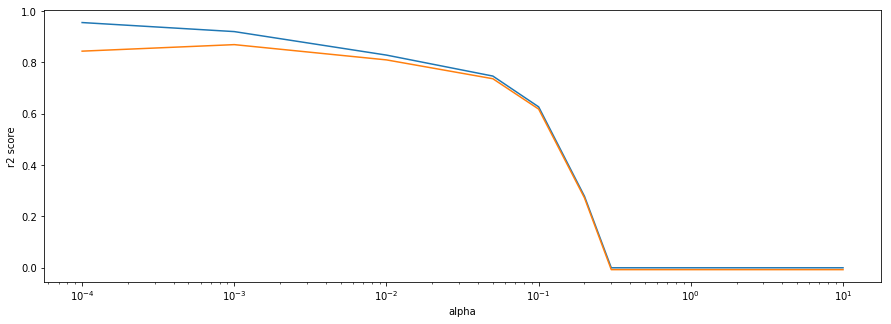

In [734]:
# plot to find the optimum alpha value
plt.figure(figsize=(15,5))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

- From the above graph, alpha is good from 10^-2 onwards 
- If alpha increases then beta also increases in python unlike Theoretical concept(alpha and beta are inversely proportional in theoretical concept)
- So, consider alpha 10^-2 is the optimal value

In [735]:
# model with optimal alpha value
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8257302566284466
0.826581878620009


In [736]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.096),
 ('LotFrontage', 0.0),
 ('LotArea', 0.043),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', 0.036),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.037),
 ('1stFlrSF', 0.028),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.152),
 ('GarageArea', 0.032),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.006),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.007),
 ('MiscVal', -0.0),
 ('Building_Age', -0.111),
 ('MSSubClass_30', -0.0),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_other_MSSubClass', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.

** Final insights from the Coefficients of Lasso Regression Model **


- *Variables affecting positively to the Price of a house*:

  - 'GrLivArea', 0.152 ==> 1 Unit increase in this variable is increasing Price of a house 0.152 times
  - 'LotArea', 0.043 ==> 1 Unit increase in this variable is increasing Price of a house 0.043 times
  - 'MasVnrArea', 0.002 ==> 1 Unit increase in this variable is increasing Price of a house 0.002 times
  - 'BsmtFinSF1', 0.036 ==> 1 Unit increase in this variable is increasing Price of a house 0.036 times
  - 'TotalBsmtSF', 0.037 ==> 1 Unit increase in this variable is increasing Price of a house 0.037 times
  - '1stFlrSF', 0.028 ==> 1 Unit increase in this variable is increasing Price of a house 0.028 times
  - 'GarageArea', 0.032 ==> 1 Unit increase in this variable is increasing Price of a house 0.032 times
  - 'WoodDeckSF', 0.01 ==> 1 Unit increase in this variable is increasing Price of a house 0.01 times
  - 'OpenPorchSF', 0.006 ==> 1 Unit increase in this variable is increasing Price of a house 0.006 times
  
  
- *Variables negatively affects the Price of a house*:

  
  - 'PoolArea', -0.007 ==> 1 Unit increasing in this variable is decreasing the Price of a house by 0.007 times
  - 'Building_Age', -0.111 ==> 1 Unit increasing in this variable is decreasing the Price of a house by 0.111 times
  - 'HeatingQC_TA', -0.009 ==> 1 Unit increasing in this variable is decreasing the Price of a house by 0.009 times
  - 'KitchenQual_TA', -0.051 ==> 1 Unit increasing in this variable is decreasing the Price of a house by 0.051 times
  - 'FireplaceQu_No Fireplace', -0.039 ==> 1 Unit increasing in this variable is decreasing the Price of a house by 0.039 times

# Ridge Regression

In [721]:
# Ridge Regression
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9577026884231541
0.8615053442890954


- From Ridge Regression:
    - We got Train datset R2 = 95.7 and 
    - We got Test dataset R2 = 86.1

In [722]:
# Ridge Model Parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 1.063),
 ('LotFrontage', -0.004),
 ('LotArea', 0.034),
 ('MasVnrArea', -0.004),
 ('BsmtFinSF1', 0.042),
 ('BsmtFinSF2', 0.001),
 ('BsmtUnfSF', -0.006),
 ('TotalBsmtSF', 0.029),
 ('1stFlrSF', 0.011),
 ('2ndFlrSF', 0.012),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.122),
 ('GarageArea', -0.02),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.011),
 ('EnclosedPorch', 0.015),
 ('3SsnPorch', 0.008),
 ('ScreenPorch', 0.017),
 ('PoolArea', 0.676),
 ('MiscVal', -0.009),
 ('Building_Age', -0.078),
 ('MSSubClass_30', -0.08),
 ('MSSubClass_50', -0.049),
 ('MSSubClass_60', -0.038),
 ('MSSubClass_70', -0.007),
 ('MSSubClass_80', 0.019),
 ('MSSubClass_90', 0.006),
 ('MSSubClass_120', -0.027),
 ('MSSubClass_160', -0.068),
 ('MSSubClass_other_MSSubClass', 0.003),
 ('MSZoning_FV', 0.392),
 ('MSZoning_RH', 0.48),
 ('MSZoning_RL', 0.373),
 ('MSZoning_RM', 0.291),
 ('Street_Pave', -0.123),
 ('LotShape_IR2', 0.013),
 ('LotShape_IR3', 0.017),
 ('LotShape_Reg', 0.007),
 ('LandContour_HLS', 0.123),
 (

In [723]:
# Grid search CV to find the optimum alpha value for Ridge Regression

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}


model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    3.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [724]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.044291  3.920219e-02         0.001387    7.966351e-04      0.0001   
1       0.021941  1.410369e-03         0.000998    7.893059e-07       0.001   
2       0.020944  8.035803e-07         0.000798    3.988031e-04        0.01   
3       0.021741  1.464591e-03         0.000997    8.449576e-07        0.05   
4       0.021343  1.016478e-03         0.001196    9.778666e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.659040           0.787418           0.800570   
1   {'alpha': 0.001}           0.676686           0.790794           0.802883   
2    {'alpha': 0.01}           0.713407           0.799204           0.807586   
3    {'alpha': 0.05}           0.771351           0.829077           0.822571   
4     {'alpha': 0.1}           0.802677           0.846949           0.834407   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.641073          -6.148159        -0.649320        2.746819   
1           0.639920          -0.295381         0.523393        0.413733   
2           0.659621           0.700669         0.736137        0.057795   
3           0.698459           0.725225         0.769397        0.051706   
4           0.719958           0.740651         0.788999        0.050406   

   rank_test_score  split0_train_score  split1_train_score  \
0               23            0.970473            0.961823   
1               22            0.969889            0.961220   
2               21            0.967623            0.958994   
3               20            0.965901            0.957890   
4               19            0.964734            0.957332   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.963536            0.968070            0.973126   
1            0.963089            0.968046            0.971959   
2            0.961231            0.967778            0.970638   
3            0.960075            0.967123            0.970152   
4            0.959442            0.966440            0.969705   

   mean_train_score  std_train_score  
0          0.967405         0.004212  
1          0.966840         0.004065  
2          0.965253         0.004389  
3          0.964228         0.004554  
4          0.963530         0.004543

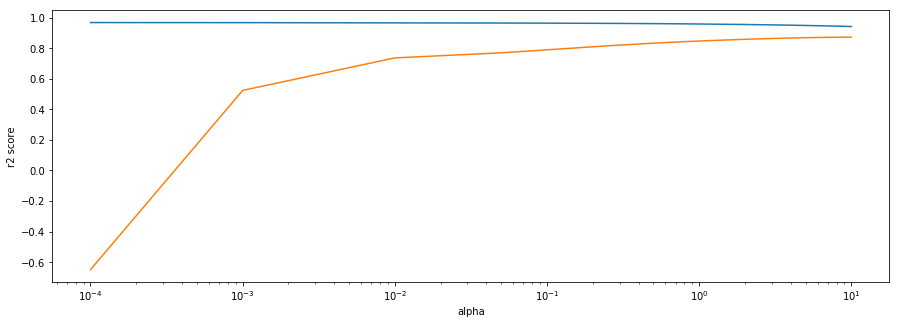

In [726]:
# Plot to find the optimum alpha value
plt.figure(figsize=(15,5))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

- From the above graph, 10^-1 is the optimum  point of alpha after that is the train and test data set graphs are becoming parallel

In [727]:
# Model with Optimal alpha
# Ridge Regression
lm = Ridge(alpha=0.1)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9539323385833932
0.8715484812870213


- With the optimal value of alpha:
    - We got R2 of 95.3 for Train dataset and 
    - We got R2 of 87.1 for Test dataset

In [728]:
# Ridge Model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.293),
 ('LotFrontage', -0.008),
 ('LotArea', 0.037),
 ('MasVnrArea', -0.007),
 ('BsmtFinSF1', 0.043),
 ('BsmtFinSF2', 0.006),
 ('BsmtUnfSF', -0.008),
 ('TotalBsmtSF', 0.016),
 ('1stFlrSF', 0.016),
 ('2ndFlrSF', 0.029),
 ('LowQualFinSF', 0.001),
 ('GrLivArea', 0.128),
 ('GarageArea', -0.038),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.015),
 ('3SsnPorch', 0.008),
 ('ScreenPorch', 0.017),
 ('PoolArea', 0.018),
 ('MiscVal', -0.001),
 ('Building_Age', -0.045),
 ('MSSubClass_30', -0.076),
 ('MSSubClass_50', -0.039),
 ('MSSubClass_60', -0.06),
 ('MSSubClass_70', -0.037),
 ('MSSubClass_80', 0.019),
 ('MSSubClass_90', 0.012),
 ('MSSubClass_120', -0.043),
 ('MSSubClass_160', -0.114),
 ('MSSubClass_other_MSSubClass', -0.009),
 ('MSZoning_FV', 0.271),
 ('MSZoning_RH', 0.346),
 ('MSZoning_RL', 0.255),
 ('MSZoning_RM', 0.185),
 ('Street_Pave', -0.09),
 ('LotShape_IR2', 0.016),
 ('LotShape_IR3', -0.015),
 ('LotShape_Reg', 0.006),
 ('LandContour_HLS', 0.12),

- **Final insights from the Coefficients of Ridge Regression Model:**


  - **Variables affecting positively to the Price of a house:**
    - 'GrLivArea', 0.128 ==> 1 Unit increase in this variable is increasing Price of a house by 0.128 times
    - 'ScreenPorch', 0.017 ==> 1 Unit increase in this variable is increasing Price of a house by 0.017 times
    - 'PoolArea', 0.018 ==> 1 Unit increase in this variable is increasing Price of a house by 0.018 times
    - 'MSZoning_FV', 0.271 ==> 1 Unit increase in this variable is increasing Price of a house by 0.271 times
    - 'MSZoning_RH', 0.346 ==> 1 Unit increase in this variable is increasing Price of a house by 0.346 times
    - 'MSZoning_RL', 0.255 ==> 1 Unit increase in this variable is increasing Price of a house by 0.255 times
    - 'LandContour_HLS', 0.12 ==> 1 Unit increase in this variable is increasing Price of a house by 0.12 times
    - 'OverallCond_9', 0.111 ==> 1 Unit increase in this variable is increasing Price of a house by 0.111 times
    - 'YearBuilt_2008', 0.103 ==> 1 Unit increase in this variable is increasing Price of a house by 0.103 times
    - 'Heating_Wall', 0.165 ==> 1 Unit increase in this variable is increasing Price of a house by 0.165 times
    - 'FullBath_3', 0.16 ==> 1 Unit increase in this variable is increasing Price of a house by 0.16 times
    - 'FullBath_1', 0.053 ==> 1 Unit increase in this variable is increasing Price of a house by 0.053 times
    - 'BedroomAbvGr_8', 0.214 ==> 1 Unit increase in this variable is increasing Price of a house by 0.214 times
    - 'GarageType_Detchd', 0.167 ==> 1 Unit increase in this variable is increasing Price of a house by 0.167 times
    - 'PoolQC_No Pool', 0.309 ==> 1 Unit increase in this variable is increasing Price of a house by 0.309 times
    - 'SaleCondition_Alloca', 0.121 ==> 1 Unit increase in this variable is increasing Price of a house by 0.121 times
    - 'SaleCondition_Normal', 0.08 ==> 1 Unit increase in this variable is increasing Price of a house by 0.08 times
    - 'SaleCondition_Partial', 0.058 ==> 1 Unit increase in this variable is increasing Price of a house by 0.058 times
  
  
  - **Variables giving Negative affect to the Price of a house:**
  
    - 'BsmtUnfSF', -0.008  ==> 1 Unit increase in this variable is decreasing Price of a house by 0.008 times
    - 'LotFrontage', -0.008 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.008 times
    - 'GarageArea', -0.038 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.038 times
    - 'Building_Age', -0.045 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.045 times
    - 'MSSubClass_30', -0.076 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.076 times
    - 'MSSubClass_50', -0.039 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.039 times
    - 'MSSubClass_60', -0.06 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.06 times
    - 'MSSubClass_70', -0.037 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.037 times
    - 'Street_Pave', -0.09 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.09 times
    - 'Neighborhood_OldTown', -0.045 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.045 times
    - 'Neighborhood_SWISU', -0.084 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.084 times
    - 'Neighborhood_Sawyer', -0.073 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.073 times
    - 'ExterCond_Fa', -0.142 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.012 times
    - 'ExterCond_Gd', -0.094 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.094 times
    - 'ExterCond_Po', -0.147 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.147 times
    - 'SaleCondition_Family', -0.001 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.001 times
    - 'YrSold_2008', -0.003 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.003 times
    - 'MiscFeature_Othr', -0.144 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.144 times
    - 'PoolQC_Gd', -0.12 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.12 times
    - 'GarageQual_Fa', -0.216 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.216 times
    - 'GarageQual_Gd', -0.122 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.122 times
    - 'GarageQual_No Garage', -0.06 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.06 times
    - 'GarageQual_Po', -0.283 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.283 times
    - 'FireplaceQu_No Fireplace', -0.013  ==> 1 Unit increase in this variable is decreasing Price of a house by 0.013 times
    - 'KitchenQual_TA', -0.038 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.038 times
    - 'KitchenAbvGr_1', -0.006 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.006 times
    - 'KitchenAbvGr_2', -0.121 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.121 times
    - 'BedroomAbvGr_5', -0.019 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.019 times
    - 'Foundation_Slab', -0.032 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.032 times
    - 'Foundation_Wood', -0.027 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.027 times
    - 'BldgType_Twnhs', -0.027 ==> 1 Unit increase in this variable is decreasing Price of a house by 0.027 times

# Final Summary Report from the both Lasso and Ridge Ression Models

- Both Lasso and Ridge are giving the same kind of observations related to the Price of House.
- Lasso Regression gives penalty to the correlated variables and make them to be zero. So Lasso is mainly useful for the feature selection process
- Ridge Regression makes to decrease the magnitude of the variable and keep them in the model. By this it keeps all the variables without removing them. 
- Coming to this Sales Price prediction problem, company has to analyze the parameters which are mainly contributing to the Sales Price so that they can buy the house at lower cost and gaining profit by selling it to high price.
- As we need to analyze various parameters in the long run to predict the House Price, **Ridge regression** is better in this case to compare and invest wisely by using various coefficients.
- For Lasso Regression  10^-2 is the optimum alpha value where as 10^-1 for Ridge Regression


- **Top variables which influence the increase in Price of House**

  - 'MSZoning_RH'(Residential High Density)
  - 'MSZoning_RL'(Residential Low Density)
  - 'PoolQC_No Pool'(Pool Quality with No Pool)
  - 'MSZoning_FV(Floating Village Residential)
  - 'GrLivArea' (Above ground living area square feet)
  - 'OverallCond_9' (Rates the overall condition of the house,9=Excellent)

- ** Top variables which influence in decreasing the Price of House**

  - 'Building_Age'(Age of the House from the time it built to present)
  - 'GarageArea' (Size of garage in square feet)
  - 'LotFrontage'(Linear feet of street connected to property)
  - 'BsmtUnfSF'(Unfinished square feet of basement area)
  - 'GarageQual_Po'(Garage quality, PO= Poor)
  - 'GarageQual_Fa',(Garage quality,Fa = Fair){It seems mainly people are looking for Good and Excellent Garage Quality}
  - 'KitchenAbvGr_2'(Kitchen above grade)
  - 'ExterCond_Fa'(Evaluates the present condition of the material on the exterior,Fa=Fair)



# Part- II subjective questions

- Testing Laso regressin with double the optimal alpha value

In [740]:
# Double the lasso Regression Optimal value 
0.01*2

0.02

In [741]:
# model with optimal alpha value
# lasso regression
lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.799850587771157
0.8030088270782774


In [742]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.05),
 ('LotFrontage', 0.0),
 ('LotArea', 0.037),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', 0.028),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.036),
 ('1stFlrSF', 0.033),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.162),
 ('GarageArea', 0.031),
 ('WoodDeckSF', 0.006),
 ('OpenPorchSF', 0.004),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('Building_Age', -0.124),
 ('MSSubClass_30', -0.0),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_other_MSSubClass', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.0),


- Testing Ridge Regression by double the optimal alpha value

In [743]:
# Model with Optimal alpha
# Ridge Regression
lm = Ridge(alpha=0.2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9533186852382672
0.8718828950663445


In [744]:
# Ridge Model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.485),
 ('LotFrontage', -0.008),
 ('LotArea', 0.038),
 ('MasVnrArea', -0.008),
 ('BsmtFinSF1', 0.043),
 ('BsmtFinSF2', 0.008),
 ('BsmtUnfSF', -0.008),
 ('TotalBsmtSF', 0.015),
 ('1stFlrSF', 0.016),
 ('2ndFlrSF', 0.029),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.129),
 ('GarageArea', -0.035),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.015),
 ('3SsnPorch', 0.008),
 ('ScreenPorch', 0.017),
 ('PoolArea', 0.007),
 ('MiscVal', 0.001),
 ('Building_Age', -0.045),
 ('MSSubClass_30', -0.074),
 ('MSSubClass_50', -0.04),
 ('MSSubClass_60', -0.057),
 ('MSSubClass_70', -0.033),
 ('MSSubClass_80', 0.023),
 ('MSSubClass_90', 0.016),
 ('MSSubClass_120', -0.038),
 ('MSSubClass_160', -0.107),
 ('MSSubClass_other_MSSubClass', -0.004),
 ('MSZoning_FV', 0.208),
 ('MSZoning_RH', 0.278),
 ('MSZoning_RL', 0.192),
 ('MSZoning_RM', 0.128),
 ('Street_Pave', -0.068),
 ('LotShape_IR2', 0.018),
 ('LotShape_IR3', -0.014),
 ('LotShape_Reg', 0.006),
 ('LandContour_HLS', 0.115)

In [746]:
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
632      0.754523  0.507962    1.204446    0.867863   -0.335327   0.382954   
208      0.085845  0.867099    0.904449    0.998850   -0.335327  -0.938083   
83       0.558493 -0.048005    0.516951   -1.392202   -0.335327   0.862725   
1174     0.558493  1.138630   -0.800532    0.620677   -0.335327   0.211996   
250     -0.621379 -1.016903   -0.800532   -1.392202   -0.335327   0.575119   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
632      0.512624  0.742404 -0.857566     -0.127323  -0.056877    0.378491   
208      0.297827  0.184003  1.219944     -0.127323   1.076160    0.178564   
83       0.199385 -0.135892 -0.857566     -0.127323  -0.895164    0.195450   
1174     0.066243  0.157441  1.351339     -0.127323   1.460774   -0.076736   
250     -0.251528  0.500784 -0.857566     -0.127323  -0.287490   -4.148927   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
632     1.068028    -1.006626      -0.399984  -0.125053    -0.307590   
208     0.361087     0.672509      -0.399984  -0.125053     3.057837   
83      0.482708    -1.006626      -0.399984  -0.125053    -0.307590   
1174   -0.936971    -1.006626      -0.399984  -0.125053    -0.307590   
250     1.268953    -1.006626      -0.399984  -0.125053    -0.307590   

      PoolArea   MiscVal  Building_Age  MSSubClass_30  MSSubClass_50  \
632  -0.062634 -0.190037      0.079728              0              0   
208  -0.062634 -0.190037     -0.351544              0              0   
83   -0.062634 -0.190037      0.593002              0              0   
1174 -0.062634 -0.190037      1.211052              0              0   
250  -0.062634  4.378242      1.054863              1              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_80  MSSubClass_90  \
632               0              0              0              0   
208               1              0              0              0   
83                0              0              0              0   
1174              0              1              0              0   
250               0              0              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_other_MSSubClass  \
632                0               0                            0   
208                0               0                            0   
83                 0               0                            0   
1174               0               0                            0   
250                0               0                            0   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
632             0            0            1            0            1   
208             0            0            1            0            1   
83              0            0            1            0            1   
1174            0            0            1            0            1   
250             0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
632              0             0             1                0   
208              0             0             0                0   
83               0             0             0                0   
1174             0             0             0                0   
250              0             0             0                0   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
632                 0                1                 0                  0   
208                 1                0                 0                  0   
83                  0                1                 0                  0   
1174                0                1                 0                  0   
250                 0                1                 0                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlo

- Removing the top 5 predictor from Lasso Regression
  - 'GrLivArea'(Above ground living area square feet)
  - 'LotArea'(Lot size in square feet)
  - 'TotalBsmtSF'(Total square feet of basement area)
  - 'MasVnrArea'(Masonry veneer area in square feet)
  - '1stFlrSF'(First Floor square feet)
  - 'GarageArea'(Size of garage in square feet)


In [747]:
X_train_new = X_train.drop(['GrLivArea','LotArea','TotalBsmtSF','MasVnrArea','1stFlrSF','GarageArea'],axis=1)

In [750]:
X_test_new = X_test.drop(['GrLivArea','LotArea','TotalBsmtSF','MasVnrArea','1stFlrSF','GarageArea'],axis=1)

In [751]:
# model with optimal alpha value
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7483628715303354
0.7390963847754604


In [758]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_new.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.191),
 ('LotFrontage', 0.053),
 ('BsmtFinSF1', 0.07),
 ('BsmtFinSF2', 0.01),
 ('BsmtUnfSF', 0.033),
 ('2ndFlrSF', 0.038),
 ('LowQualFinSF', 0.002),
 ('WoodDeckSF', 0.029),
 ('OpenPorchSF', 0.032),
 ('EnclosedPorch', 0.003),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.022),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('Building_Age', -0.093),
 ('MSSubClass_30', -0.0),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', -0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', -0.0),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_other_MSSubClass', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.015),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_